<font size=3 color='blue'>
    
  # <center>Clase 2, febrero 23 del 2022</center> 

<font size=3 color='blue'>
    
  # <center>Ajuste de un conjunto de puntos con una función</center> 

<font size=2 color='blue'>
    
# Generación de las muestras

<font size=4 >
$$ $$
Se genera un conjunto de $m$ numeros aleatorios ($(x_1,y_1),(x_2,y_2),…,(x_m,y_m)$)

In [1]:
# Importing the python libraries

import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

# To have a reproducible code we use a random seed 
np.random.seed(3)

In [2]:
# Esta función genera un conjunto de datos que simulan 
# la medición de la distancia de un carrito en un riel de aire
# en la ausencia de una fuerza sobre el carrito.
# Se propone un error en la medición de la distancia

def generador_datos_simple(n_points, distance_0, measuring_time, speed, max_distance_error):
    
    """
      n_points: number of point that will be generated, integer
      distance_0 : initial distantce (at time zero) 
      measuring_time: the time inteval used for the measurement
      speed : carś speed
      max_distance_error: Maximum error measuring distance
      
    """
    
    # n_points es el número de puntos que serán generados
    
    x = np.random.random(n_points) * measuring_time
     
    # x es arreglo con m numeros aleatorios entre 0.0 y measuring_time
    
    error = np.random.randn(n_points) * max_distance_error 
    
    # error es un error generado aleatoriamente con un valor maximo max_distance_error

    y = distance_0 + speed*x + error 
        
    return x, y


In [3]:
# Generacción de las muestras (xi,yi)
n_points = 1000
distance_0 = 100.0
measure_time = 100.0
speed = 20.0
max_distance_error = 100

x, y = generador_datos_simple(n_points, distance_0, measure_time, speed, max_distance_error)

print("x type", type(x), "x shape", x.shape)
print("y type", type(y), "y shape", y.shape)

x type <class 'numpy.ndarray'> x shape (1000,)
y type <class 'numpy.ndarray'> y shape (1000,)


x = np.squeeze(x)
y = np.squeeze(y)
print("x type", type(x), "x shape", x.shape)
print("y type", type(y), "y shape", y.shape)

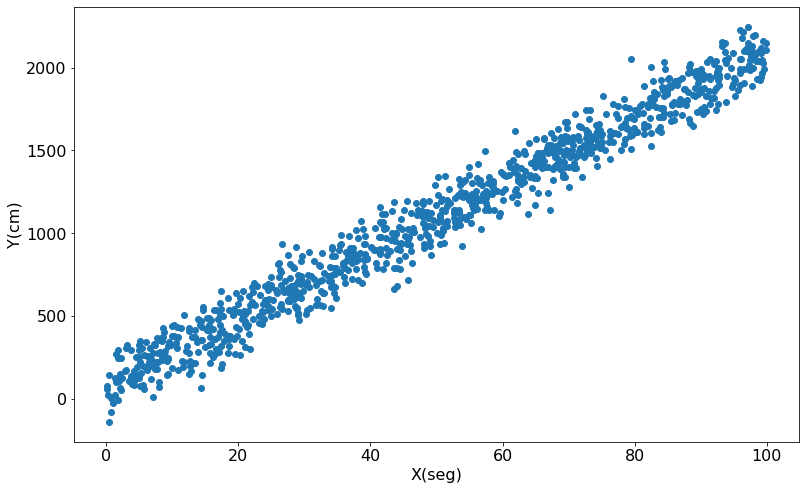

In [4]:
# Plotting y versus x

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y(cm)', fontsize=16)
plt.xlabel('X(seg)', fontsize=16)

plt.scatter(x, y)
plt.show()

<font size=2 color='blue'>

# Buscando la correlación entre las muestras:



<font size=4>

Se tiene un conjunto de muestras (puntos) $(x_i, y_i)$, y se busca encontrar una función $F$ que describa una posible correlación entre ellos. $X$, con valores $x_i$ (en el presente caso el tiempo) es una variable independiente, mientras que $Y$, con los valores $y_i$ (la distancia en el presente caso) depende de $X$.

Para encontrar la correlación entre las muestras, proponemos un conjunto de funciones definidas mediante la siguiente relación lineal:

$$ F(X, W, b) = b + W X $$

en donde los parámetros $b$ y $W$ son parámetros que definenen cada función. Estos parámetros deben ser actualizadas hasta encontrar los valores que definan la función que mejor describa la correlación entre $X$ y $Y$. $$ $$
Vemos que esta relación funcional es derivable respecto a todas las variables, $X$, y los parámetros$ W, b$.
La letra $W$ se emplea como abreviación de la palabra en ingles "weight", porque se relaciona con la importancia que tiene la variable $X$ en el valor de la función $F$. La letra b es la abreviación de la palabra "bias" en ingles, "sesgo" en castellano, y representa el valor de la función $F$ cuando la variable $X$ tiene el valor cero.


<font size = 4>

Para encontrar la función que describe la correlación entre los puntos, es necesario generar una métrica que cuantifique el error con que una funcione específica (definida por $W$ y $b$) describe al conjunto de puntoss.

La métrica que se propone es la siguiente: $$ $$

Para cada muestra $(x_i, y_i)$ se evalua $F(x_i,W,b)$ y se compara con el correspondiente valor $y_i$, la diferencia entre estos valores se eleva al cuadrado. $$ $$
   $$ (F(x_i,w,b)-y_i)^{2}$$


Finalmente se calcula el promedio de este valor sobre todas las muestras, el cual definimos como error cuadrático medio (MSE, por sus siglas en ingles, Mean Squared Error). 
Si m es el número de muestras, el MSE queda como:

$$MSE = \dfrac {1}{m}∑_{i=1}^{m}(F(x_i,w,b)-y_i)^{2} $$

<font size=4, color='blue'>
    
En el siguiente código se implementa la generación del error cuadrático medio dada una función específica definida por los pesos iniciales $W$= weight_0, y $b$ = bias_0.

In [5]:
#Initializing the parameter defining the function F

weight_0 = 10.0
bias_0 = 100.0

<font size=4 color="blue">

Se grafica la correspondiente función $F(X,W,b)$, junto con los puntos que representan a las muestras

In [6]:
# Function for plotting (x,y) and (x,y_)

def plot_x_y_y__(x, y, y_, points=True):
    
    plt.figure(figsize=(13,8))
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=16)
    plt.ylabel('Y(cm)', fontsize=16)
    plt.xlabel('X(seg)', fontsize=16)

    #Plotting function
    plt.plot(x, y_, color='green', lw=4, label='F(X, W, b)')
    plt.legend()

    #Plotting samples
    plt.scatter(x, y)

    plt.show()
    
    

<font size=4>

Se grafica la correspondiente función f para los valores $x_i$, así como las muestras $(x_i, y_i)$

residuo:  342017.35


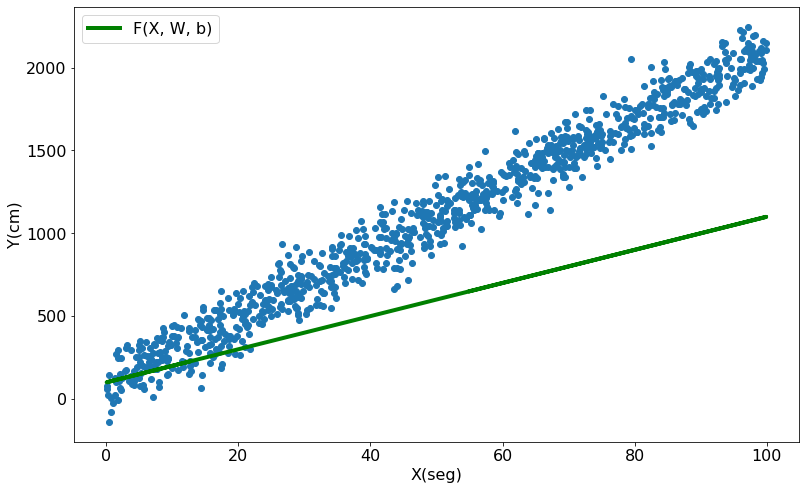

In [7]:
#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)

y_ = weight_0*x + bias_0

# Using the function F, the residuos is calculated by comparing the calculated and measured values

residuo = np.mean((y-y_)**2)

print('residuo: {0:10.2f}'.format( residuo))

plot_x_y_y__(x, y, y_, points=True)

<font size=4>

De la gráficas se observa que la función está lejos de describir correctamente la correlación entre los puntos. 


<font size=4 color="blue">

Los valores del peso $W$ y el bias $b$ se actualizan iterativamente a prueba y error. Para ello

se hacen los cambios de acuerdo a la sugerencia de la observado en la gráfica. 

In [8]:
def update_weights_biases(x, y, weight, bias, delta_weight, delta_bias):
    
    weight = weight + delta_weight
    
    bias = bias + delta_bias

    #The following date are for constructing the F(x,weight, bias)
    
    y_ = weight*x + bias
       
    mse = np.mean((y - y_)**2)
    
    #print('residuo: {:10.2f}'.format(residuo))   
        
    return weight, bias, y_, mse

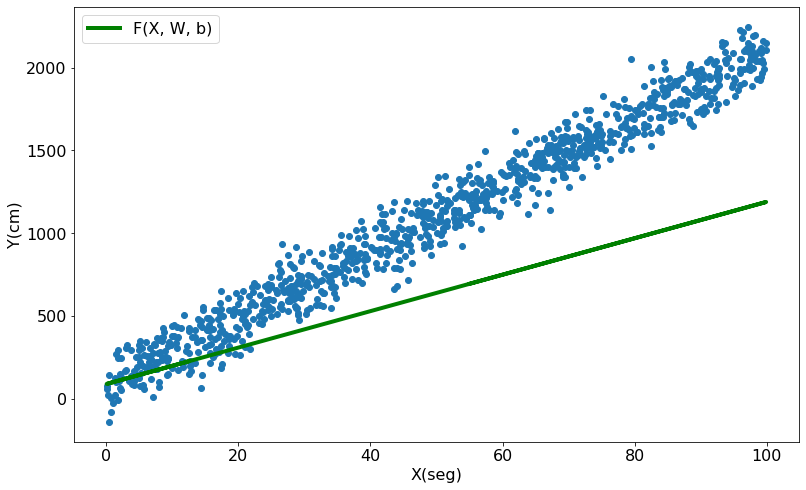

In [9]:
weight = weight_0
bias = bias_0
delta_w = 1.0
delta_b = -10.0

weight, bias, y_, mse = update_weights_biases(x, y , weight, bias, delta_w, delta_b)
plot_x_y_y__(x, y, y_, points=True) 

<font size=4>

El cambio es muy pequeño, por ello el peso se actualiza con delta_weight = 2.0 y el bias con delta_bias= -100.0. 

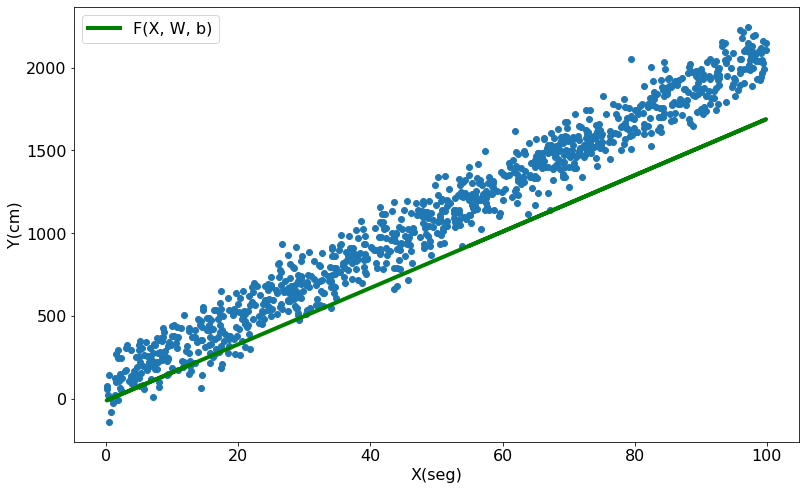

In [10]:
weight = weight
bias = bias
delta_w = 6.0
delta_b = -100.0

weight, bias, y_, mse = update_weights_biases(x, y, weight, bias, delta_w, delta_b)
plot_x_y_y__(x, y, y_, points=True) 

<font size=4>

Aun se puede mejorar disminuyendo el peso (pendiente) y aumentando el bias (ordenada en el origen):

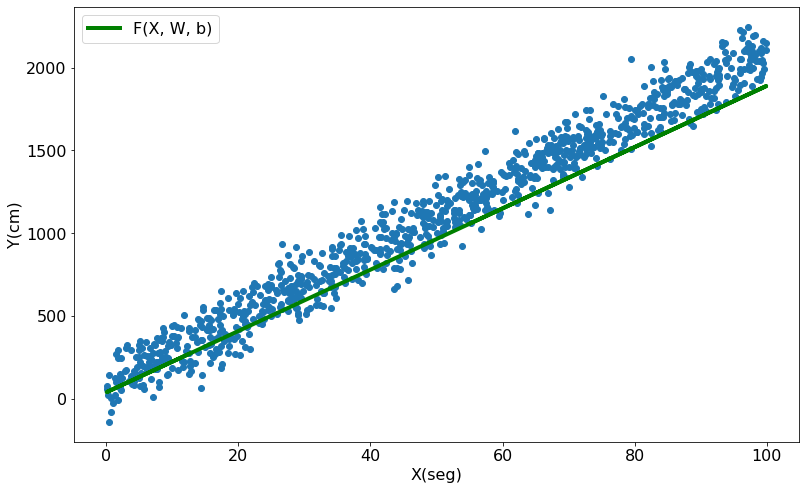

In [11]:
weight = weight
bias = bias
delta_w = 1.5
delta_b = 50.0

weight, bias, y_, mse = update_weights_biases(x,y, weight, bias, delta_w, delta_b)
plot_x_y_y__(x, y, y_, points=True) 

<font size=4>

Se puede mejorar el resultado. Para ello se observa el cambio en el error cuadrático medio con los cambios en $W$ y en $b$.

<font size=4 color='blue'>
    
Busquemos encontrar la función que defina la correlación generando un conjunto de
    
funciones y calcular el correspondiente error cuadrático medio.

<font size=4>

Para ello emplearemos la función **update_weight_bias()**, la cual actualiza los parametros $W$ y $b$.

In [12]:
update_outputs = []

weight = weight_0
bias = -3.0
delta_w = 0.2 
delta_b = 0.0
iterations = 100

for i in range(iterations):
    
    weight, bias, y_, mse = update_weights_biases(x, y, weight, bias, delta_w, delta_b)
    
    update_outputs.append([weight, bias, y_, mse])
    
    if i % 10 == 0 :
            print('weight: {0:8.2f}    bias: {1:5.2f}   MSE: {2:10.2f}'.format(weight,bias, mse))

weight:    10.20    bias: -3.00   MSE:  440109.02
weight:    12.20    bias: -3.00   MSE:  301967.33
weight:    14.20    bias: -3.00   MSE:  190673.42
weight:    16.20    bias: -3.00   MSE:  106227.30
weight:    18.20    bias: -3.00   MSE:   48628.98
weight:    20.20    bias: -3.00   MSE:   17878.44
weight:    22.20    bias: -3.00   MSE:   13975.69
weight:    24.20    bias: -3.00   MSE:   36920.73
weight:    26.20    bias: -3.00   MSE:   86713.55
weight:    28.20    bias: -3.00   MSE:  163354.17


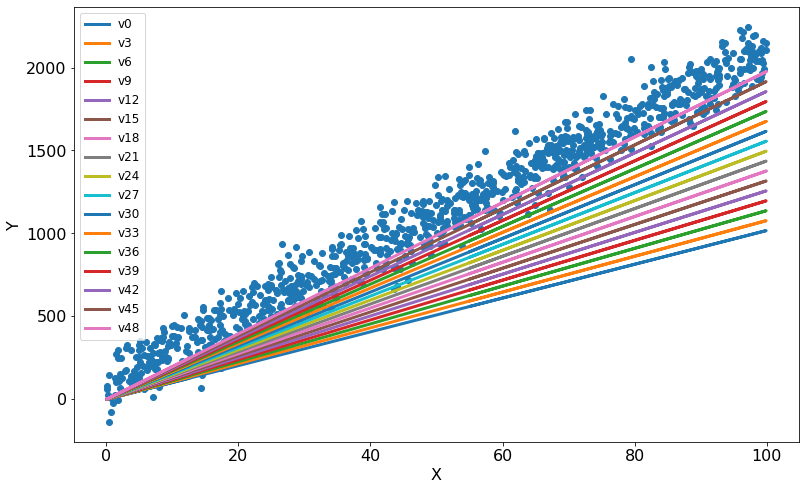

In [13]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

for i in range(0,50,3):

    plt.plot(x, update_outputs[i][0]*x + update_outputs[i][1], label='v' + str(i), lw=3)
    plt.legend()

plt.scatter(x, y)

plt.show()

<font size=4>

A continuación se grafica el error cuadrático medio obtenido para cada función al variar el parámetro W.
 
 El valor óptimo del parámetro es aquel donde el error cuadrático medio toma su valor mínimo. 

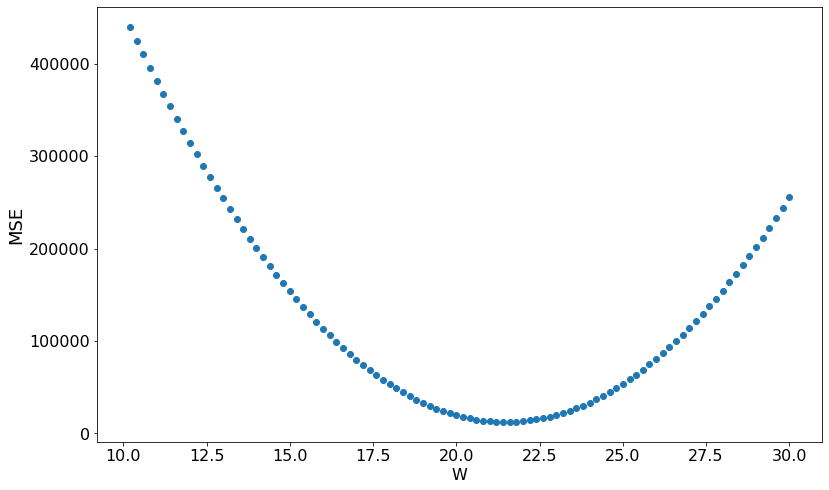

In [14]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('MSE', fontsize=18)
plt.xlabel('W', fontsize=16)

weights = []

mse = []

for update_output in update_outputs:
    
    weights.append(update_output[0])
    
    mse.append(update_output[3])
    
plt.scatter(weights, mse)


plt.show()

<font size = 4>

Como se observa en la grafica anterior, el mínimo del error cuadrático medio, MSE, esta alrededor de $W$= 22.

In [15]:
index_min = np.argmin(mse)   # returns the index for the minimum value in the list

print('El MSE mas pequeño tiene el valor: {0:10.2f}'.format(update_outputs[index_min][3]))

w_opt = update_outputs[index_min][0]
b_opt = update_outputs[index_min][1]

print('Los valores optimos de los parámetros son W = {0:5.2f} y b = {1:5.2f} ' \
      .format(w_opt, b_opt))

El MSE mas pequeño tiene el valor:   12315.05
Los valores optimos de los parámetros son W = 21.40 y b = -3.00 


<font size = 4>

Se grafica la recta con los valores óptimos encontrados w_opt and b_opt :

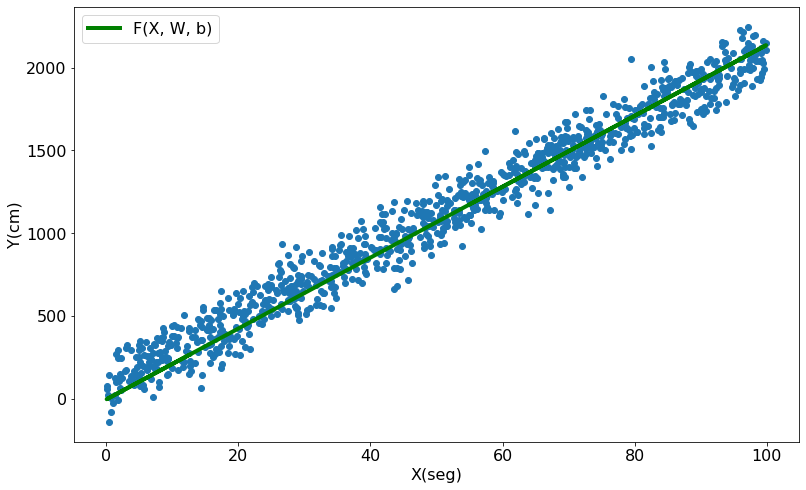

In [16]:
y_ = w_opt*x + b_opt

plot_x_y_y__(x, y, y_, points=True)

<font size=4 color='blue'>
Se genera la derivada parcial del residuo respecto a $W$ para cada valor de $W$ y se grafica.

In [17]:
mse_array = np.asarray(mse)

In [18]:
mse_grad = np.gradient(mse_array)
#residuos_grad

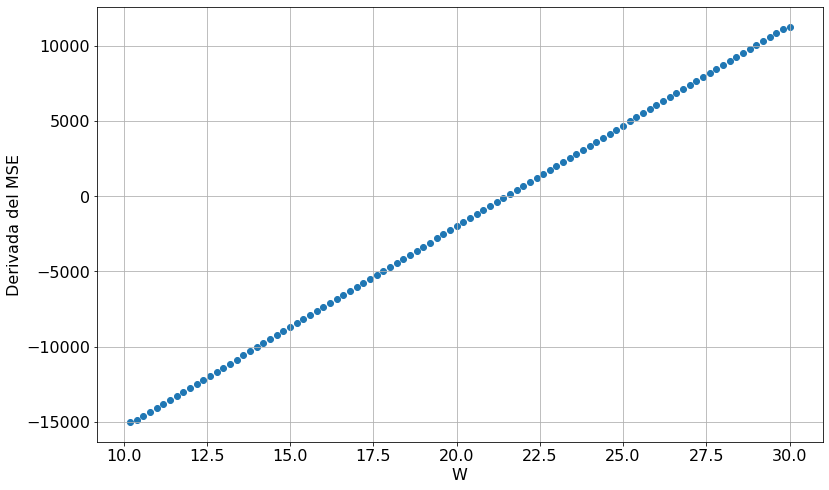

In [19]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Derivada del MSE', fontsize=16)
plt.xlabel('W', fontsize=16)
plt.grid(True)
plt.scatter(weights, mse_grad)

plt.show()

<font size=4>

En este caso, como el error cuadrático medio es una parábola, su derivada esta dada por la recta. 
    
$$ \dfrac{∂MSE}{∂{W}} = -\dfrac {2}{m} ∑_{i=1}^{m}(y_i - b -Wx_i)x_i= -\dfrac {2}{m} ∑_{i=1}^{m}(y_i x_i- b x_i-Wx_i^{2})$$

$$ $$
En general para cualquier otro problema, el MSE tendrá una forma muy diferente al de una parábola

<font size=4 color='blue'>

Se generan un conjunto de funciones dejando $W$ fija y variando $b$.

In [20]:
update_outputs = []

weight =  w_opt
bias = b_opt
delta_w = 0.0
delta_b = 1.0
iterations = 100

for i in range(iterations):
    
    weight, bias, y_, mse = update_weights_biases(x, y, weight, bias, delta_w, delta_b)
    
    update_outputs.append([weight, bias, y_, mse])
    
    if i % 10 == 0 :
        print('weight: {0:5.2f},   bias: {1:5.2f},   MSE: {2:8.2f}'.format(weight,bias,mse))

weight: 21.40,   bias: -2.00,   MSE: 12263.52
weight: 21.40,   bias:  8.00,   MSE: 11858.15
weight: 21.40,   bias: 18.00,   MSE: 11652.78
weight: 21.40,   bias: 28.00,   MSE: 11647.41
weight: 21.40,   bias: 38.00,   MSE: 11842.04
weight: 21.40,   bias: 48.00,   MSE: 12236.67
weight: 21.40,   bias: 58.00,   MSE: 12831.30
weight: 21.40,   bias: 68.00,   MSE: 13625.92
weight: 21.40,   bias: 78.00,   MSE: 14620.55
weight: 21.40,   bias: 88.00,   MSE: 15815.18


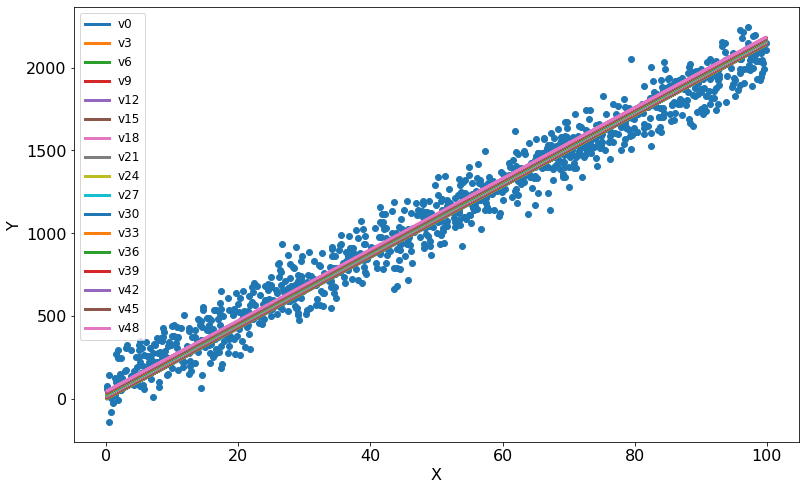

In [21]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=12)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)

for i in range(0,50,3):

    plt.plot(x, w_opt*x + update_outputs[i][1], label='v' + str(i), lw=3)
    plt.legend()

plt.scatter(x, y)

plt.show()

<font size=4>

A continuación se grafica el error cuadrático medio en función de $b$.
 
 El valor óptimo de $b$ es aquel que minimiza este error. 

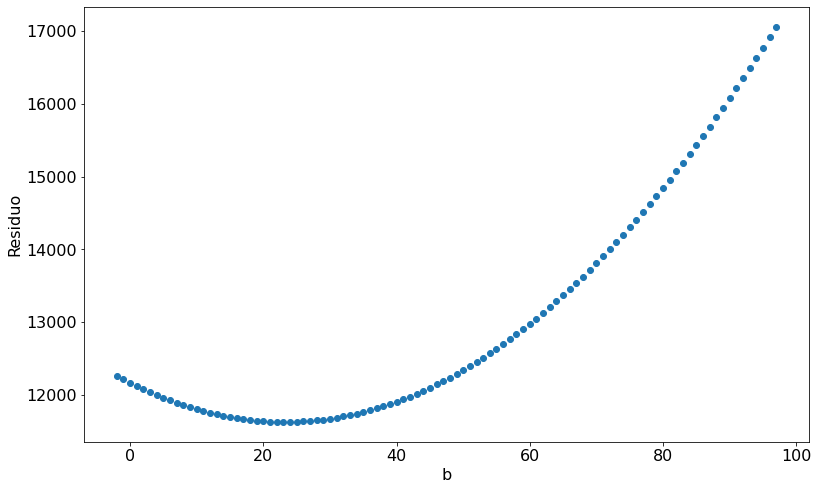

In [22]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Residuo', fontsize=16)
plt.xlabel('b', fontsize=16)

bias = []

mse = []

for update_output in update_outputs:
    
    bias.append(update_output[1])
    
    mse.append(update_output[3])
    
plt.scatter(bias, mse)

plt.show()

<font size = 4>

Como se observa en la grafica el mínimo del MSE corresponde a un valor de $b$ alrededor de 20.

In [23]:
index_min = np.argmin(mse)   # returns the index for the minimum value in the list
mse_min = update_outputs[index_min][3]

print('El MSE mas pequeño tiene el valor: {0:10.2f}'.format(mse_min))

w_opt = update_outputs[index_min][0]
b_opt = update_outputs[index_min][1]

print('Los valores optimos de los parámetros son W = {0:5.2f} y b = {1:5.2f} ' \
      .format(w_opt, b_opt))

El MSE mas pequeño tiene el valor:   11625.09
Los valores optimos de los parámetros son W = 21.40 y b = 23.00 


<font size = 4>

Se grafica la recta empleando los valores óptimos $W$, w_opt, y $b$, b_opt.

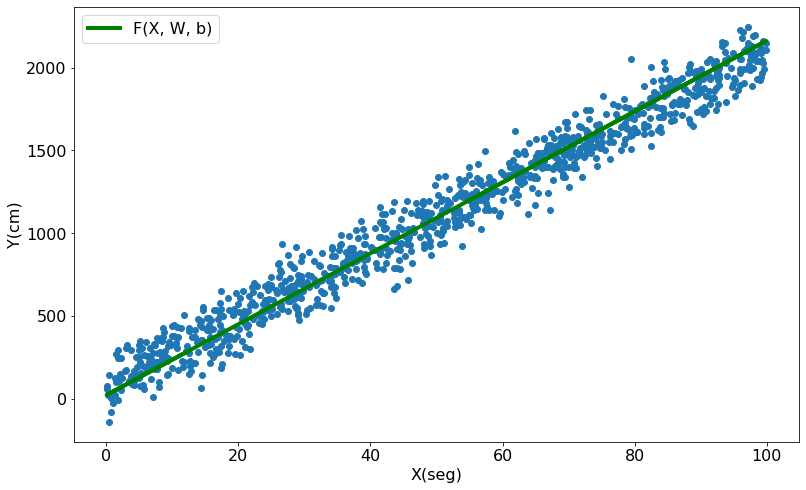

In [24]:
y_ = w_opt*x + b_opt
y_hand = y_

plot_x_y_y__(x, y, y_, points=True)

<font size=4 color='blue'>
Se genera la derivada parcial del residuo respecto a $W$ para cada valor de $W$ y se grafica.

In [25]:
mse_array = np.asarray(mse)

In [26]:
mse_grad = np.gradient(mse_array)
#residuos_grad

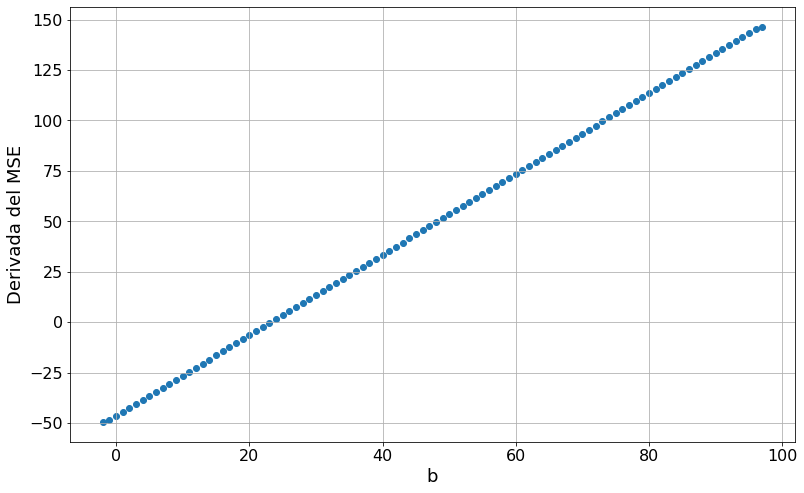

In [27]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Derivada del MSE', fontsize=18)
plt.xlabel('b', fontsize=18)

bias = []

mse = []

for update_output in update_outputs:
    
    bias.append(update_output[1])
    
    mse.append(update_output[3])

plt.grid(True)
plt.scatter(bias, mse_grad)

plt.show()

<font size=4>

En este caso, como el MSE es una parábola, su derivada esta dada por la recta 
    
$$ \dfrac{∂MSE}{∂{b}} = -\dfrac {2}{m} ∑_{i=1}^{m}(y_i - b -Wx_i)$$

$$ $$
En general para cualquier otro problema, el error cuadrático medio tendrá una forma muy diferente al de una parábola

<font color = 'blue' size = 4>
    
## <center>Métodos alternativos para optimizar los parámetros $W$ y $b$</center>

<font color = 'blue' size = 4>

### Método simple de mínimos cuadrados, de acuerdo a Gauss

<font size=4>

El método de mínimos cuadrados nos permite encontrar una función que describe la correlación que tienen un conjunto m de puntos $(x_i, y_i)$, en donde $x_i$ son los valores que toma la variable $X$ y $y_i$ son los valores que toma la variable $Y$.


El objetivo del algoritmo es obtener la relación entre la variable independiente $X$, y la variable dependiente $Y$.

En el presente caso, se propone una función linear para describir la correlación:

$$ F(X,W,b) = b + W X $$
 

Los parámetros variables $b$  y $W$ definen a la función $F$. 

Con el método simple de mínimos cuadrados se hallan los valores óptimos w_opt y b_opt de estas variables para los cuales el MSE tiene un valor mínimo.

<font size = 4>

La diferencia entre el valor real $y_i$ de $Y$ y el valor estimado $F(x_i, W, b)$ se denomina el error ($r_i$):

$$ r_i = y_i - F(x_i, W, b) $$

El objetivo del método de mínimos cuadrados es minimizar la suma del cuadrado de estos errores, es decir, encontrar el mínimo del error cuadrático medio, MSE:

$$ MSE = \dfrac {1}{m} ∑_{i=1}^{m}(y_i - b -Wx_i)^{2} $$

El mínimo de esta función, se encuentra en aquellos valores de $W$ ($W_{opt}$) y $b$ ($b_{opt}$) en donde la derivada de la función MSE es igual a zero. 
$$ $$Pora encontrar esta mínimo, primero calculamos la derivada parcial de la función respecto a cada uno de los parámetros $W$ y $b$, después, cada derivada la igualamos a cero:

$$ \dfrac{∂MSE}{∂{W}} =0⟶ W_{opt}=\dfrac{∑_{i=1}^{n}(x_i–\bar x)(y_i–\bar y)}{∑_{i=1}^{m}(x_i–\bar x)^2}$$


$$ \dfrac{∂MSE}{∂{b}}=0⟶ b_{opt}=y – W_{opt} x $$

en donde $\bar x$ y $\bar y$ son los valores promedio de los valores de las variables $X$ y $Y$.



In [28]:
def mean_square_error(x, y):
    
    # 1) Se obtiene el promedio de los valores x_i y y_i

    mean_x = np.mean(x)

    mean_y = np.mean(y)

    # 2) se calcula (x_i-x) y (y_i-y), con x e y los promedios de x_i e y_i, respectivamente.

    x_i = []

    for i in x:

        x_i.append(np.squeeze(i) - mean_x)

    y_i = []

    for i in y:

        y_i.append(np.squeeze(i) - mean_y)

    # 3) se calcula (x_i-x)*(x_i-x)

    x_i2 = np.power(x_i, 2)

    # 4) se hacen las sumas correspondientes

    xy_sum = 0

    for i in range(len(x_i)):

        xy_sum += x_i[i]*y_i[i]

    x2_sum = 0

    for i in range(len(x_i)):

        x2_sum += x_i2[i]

    # Se definen a w y b 

    w = xy_sum/x2_sum

    b = mean_y - w*mean_x
       
    return w, b



In [29]:

w_opt_mse, b_opt_mse = mean_square_error(x, y)

print(" w_opt = {0:5.2f}, b_opt = {1:5.2f}".format(w_opt_mse,b_opt_mse))

 w_opt = 20.13, b_opt = 87.26


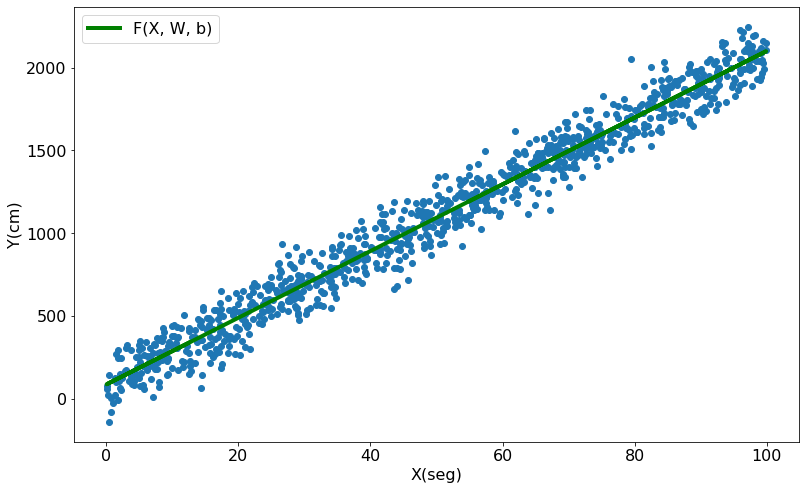

In [30]:
y_ = w_opt_mse*x + b_opt_mse

plot_x_y_y__(x, y, y_, points=True)

In [31]:
minimal_MSE = np.mean((y-w_opt*x-b_opt)**2)
print('MSE mínimo: {0:10.2f}'.format(minimal_MSE))

MSE mínimo:   11625.09


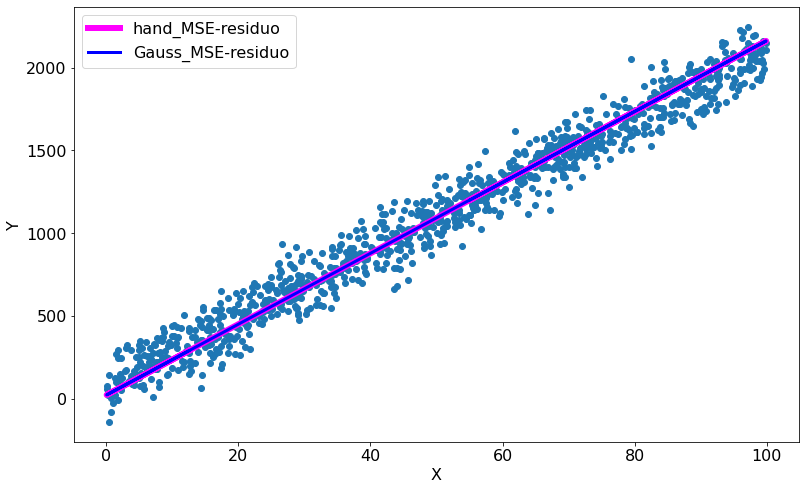

In [32]:
y_minimal_MSE = x*w_opt + b_opt

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)


plt.plot(x, y_hand, color='magenta', label='hand_MSE-residuo', lw=6)

plt.plot(x, y_minimal_MSE, color='blue', label = 'Gauss_MSE-residuo', lw=3)

plt.legend()

plt.scatter(x, y)

plt.show()


<font size=4>

Como vimos anteriormente, la función $F(X,W,b)$ que describe la correlacion entre las variables $X$ y $Y$, se obtiene definiendo la métrica descrita por la función MSE.
Cuando esta función MSE tiene su mínimo (el error mínimo) su derivada es cero. Es por ello, que podriamos emplear el método de Newton-Raphson para encontrar este cero.

<font size=5 color='blue'>
    
Método de Newton-Raphson para encontrar el cero de una función. 
    
Este método emplea la función y su derivada.
    


<font size=4>

Otra alternativa para encontrar los valores de W y b para los cuales el residuo es mínimo es emplear un método iterativo desarrollado por Isaac Newton y Joseph Raphson en el siglo XVII para encontrar los ceros de una función. Hoy en día, este método es conocido como el método de Newton-Raphson.
   
Para emplear este método en nuestro caso se tendría que obtener la derivada de la función MSE. Los valores de $W$ y $b$ se actualizarían empleando la siguiente relación:   
    
 $$W_{new} = W_{actual} - \dfrac {MSE} {\dfrac {∂MSE}{∂{W}}}$$
    
 $$b_{new} = b_{actual} - \dfrac {MSE} {\dfrac {∂MSE}{∂{b}}}$$

<font size=4>

El código que generaremos para emplear este método requiere un valor inicial de la variable que define la función, así como una epsilon para estimar si el error ya se puede considerar como cero. El método tambien toma en cuenta el número máximo de iteraciones que se deben realizar para encontrar este cero.

<font size=4>

Para introducir este método emplearemos la función $f(x)$ que depende de $x$, y de la cual queremos obtener sus ceros. La expresión correspondiente queda como:


 $$x_{new} = x_{actual} - \dfrac {f(x)} {\dfrac {df(x)}{d{x}}}$$
    

<img src = "NewtonIteration_Ani.gif">

(By Ralf Pfeifer - de:Image:NewtonIteration Ani.gif, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=2268473)

<font size=4>
A continuación definimos la función newton_raphson para implementar este método

In [33]:
def newton_raphson(f, Df,x0,epsilon,max_iter):
    '''Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    f : function
        
    Df : Derivative of f(x).
    
    x0 : Initial guess for finding the root of f(x).
    
    epsilon :Stopping criteria: the iteration ends when abs(f(x)) < epsilon.
    
    max_iter : Maximum number of iterations of Newton's method.

    Returns
    -------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.
    '''
    
    aprox_root = [x0]
    
    xn = x0
      
    # xn es la aproximación de la raíz de f. Inicialmente xn =x0 con x0 la primera aproximación
    
    for n in range(0,max_iter):
        
        fxn = f(xn)
       
        #print("xn = ", xn, "aprox_root = ", aprox_root)
        
        if abs(fxn) < epsilon:
            
            print("x = ", xn, ", f(x) = ", fxn, ", df(x)/dx = ", Dfxn)
            print('The solution is found after',n,'iterations.')
                        
            return xn, aprox_root
        
        Dfxn = Df(xn)
        
        if Dfxn == 0:
            
            print('Zero derivative. No solution found.')
            
            return None
        
        print("x = ", xn, ", f(x) = ", fxn, ", df(x)/dx = ", Dfxn)
        
        xn = xn - fxn/Dfxn
        
        aprox_root.append(xn)
        
    print('Exceeded maximum iterations. No solution found.')
    
    return None

<font size=4>

Se prueba este método con una función simple

In [34]:
#p = lambda x: x**3-10

def p(x):
    
    return x**3-10

(100,)
[-1010.     -951.192  -894.736  -840.584  -788.688]


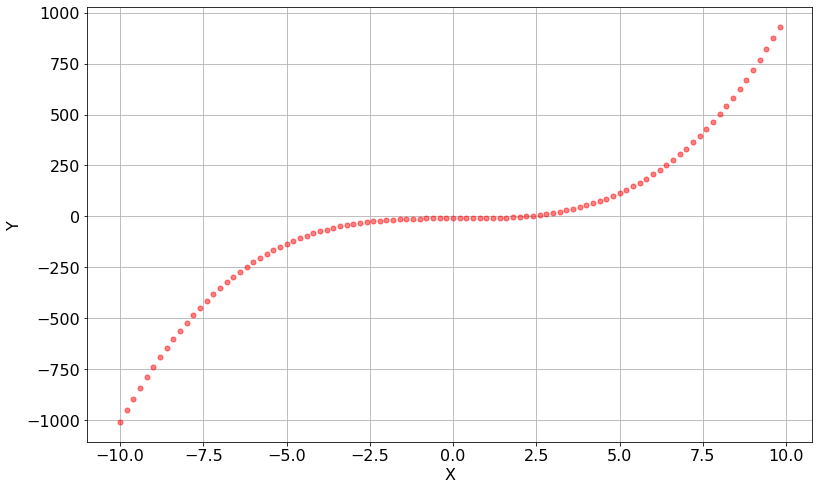

In [35]:
x_ = np.arange(-10, 10, 0.2)
print (x_.shape)
sigma_samples = 5
y_ = p(x_)
print(y_[:5])

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)


plt.grid(True)

plt.plot(x_, y_, "o", ms=5, alpha= 0.5, color='r')

plt.show()

#print(y_)

<font size=4 color='blue'>
Calculemos la derivada de la función

In [36]:
#Dp = lambda x: 3*x**2 

def Dp(x):
    
    return 3*x**2



<font size=4 color='blue'>
Para visualizar el método dibujemos la pendiente en cada punto en donde esta se calcula durante la búsqueda del cero.

In [37]:
def tangent_line(f, Df, x_0, a, b):
        
    x = np.linspace(a,b)
    
    y = f(x) 
    
    y_0 = f(x_0)
    
    y_tan = Df(x_0) * (x - x_0) + y_0 
    
    plt.figure(figsize=(13,8))
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=16)
    plt.ylabel('Y', fontsize=16)
    plt.xlabel('X', fontsize=16)



    #plt.plot(x,y,'r-')
    plt.plot(x_, y_, "o", ms=5, alpha= 0.5, color='r')
    
    plt.plot(x,y_tan,'b-')
    
    plt.xlabel('x') 
    
    plt.ylabel('y') 
    
    plt.grid(True)
    
    plt.title('Plot of the function and its tangent at x') 
    
    plt.show()  

x =  7.5 , f(x) =  411.875 , df(x)/dx =  168.75
x =  5.059259259259259 , f(x) =  119.49732743992277 , df(x)/dx =  76.78831275720165
x =  3.5030676573189545 , f(x) =  32.987835245814814 , df(x)/dx =  36.81444903526233
x =  2.607010915733123 , f(x) =  7.718565108602302 , df(x)/dx =  20.38951774425497
x =  2.2284553655030486 , f(x) =  1.066539019287422 , df(x)/dx =  14.898039948117976
x =  2.1568661481965026 , f(x) =  0.03389571255494239 , df(x)/dx =  13.956214743708053
x =  2.1544374300105615 , f(x) =  3.815361182901711e-05 , df(x)/dx =  13.956214743708053
The solution is found after 6 iterations.


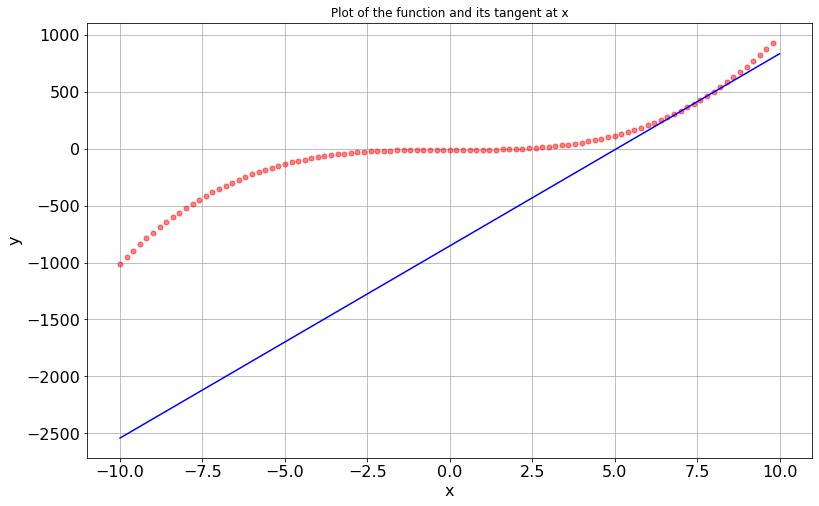

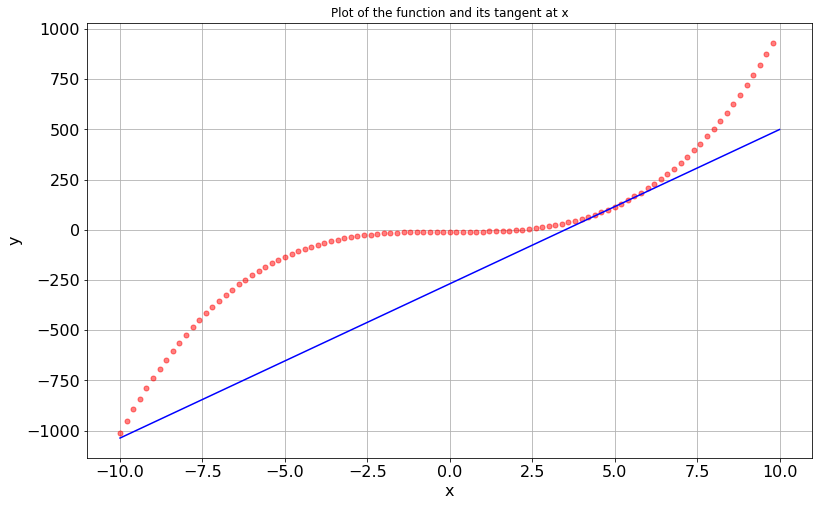

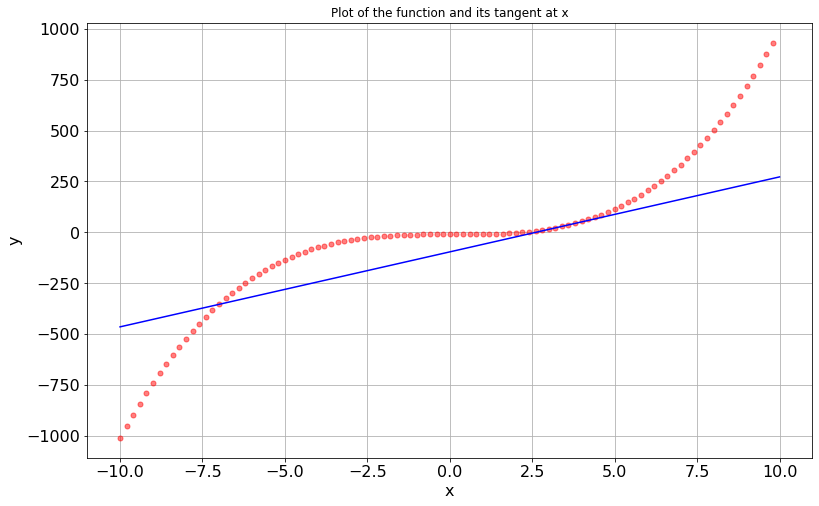

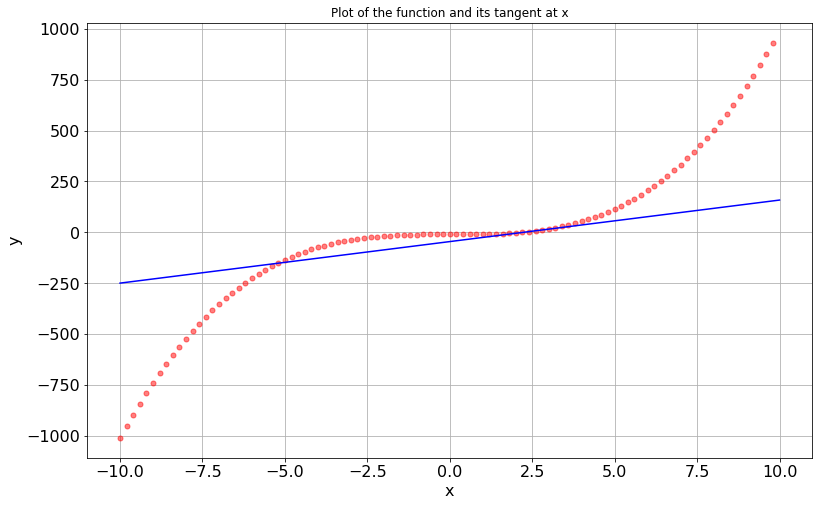

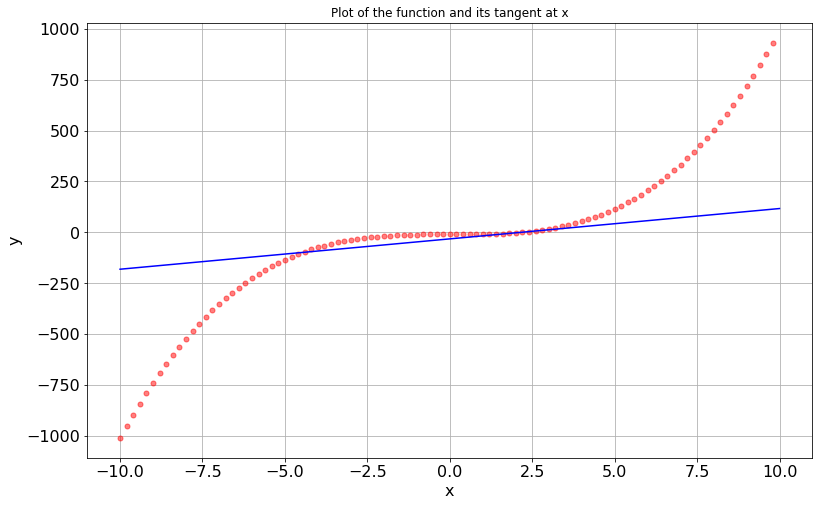

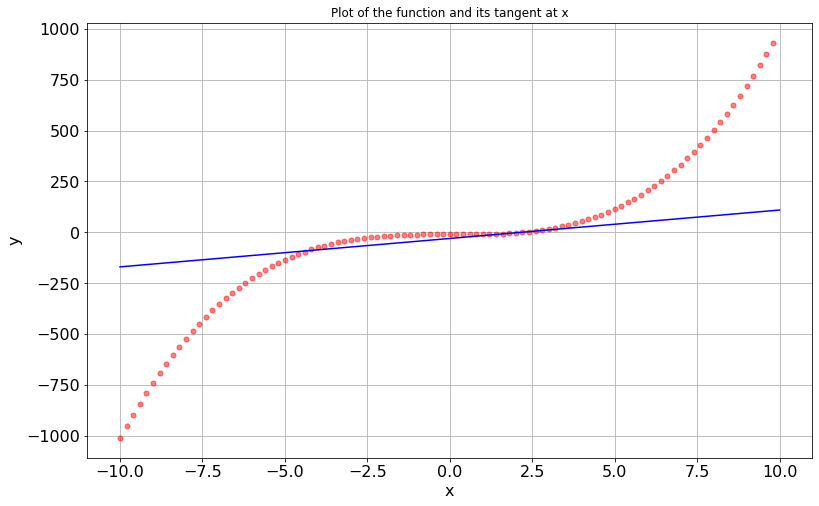

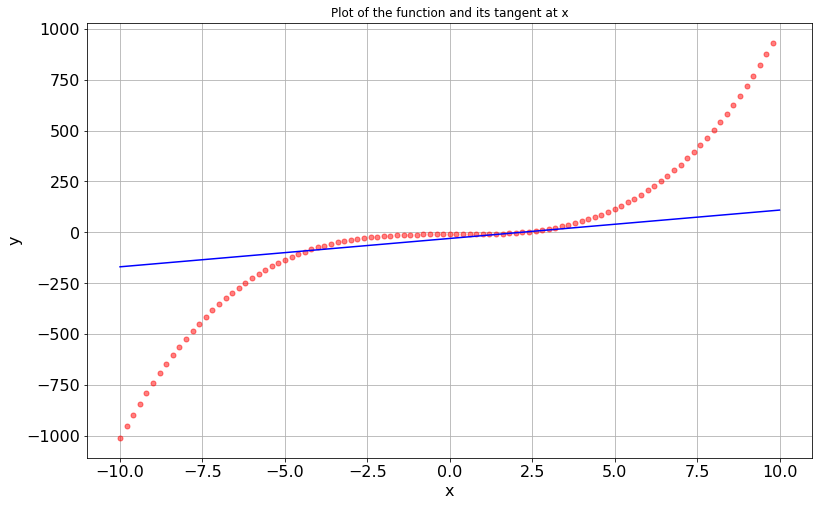

In [38]:

for i in newton_raphson(p,Dp,7.5,0.001,50)[1]:

    tangent_line(p, Dp, i, -10, 10)

<font size=4>

Para aplicar este método en nuestro caso, es necesario implementarlo para dos variables ($W$ y $b$). Sin embargo, en nuestro caso el gradiente del error cuadrático medio, MSE, varía linealmente con cada una de estas variables. Su pendiente es entonces constante.

El método en general ha sido implementado para problemas con multivariables (número de variables mayor a 2)

[Newton-Raphson Multivariate](./Literatura/Newton-Raphson-multivariate.pdf)

<font size=4>

Otra alternativa para encontrar los valores de $W$ y $b$ para los cuales el error cuadrático medio es mínimo, es emplear un método iterativo desarrollado por Cauchy en el siglo XIX. Hoy en día este método de optimización es conocido como el método de gradiente descendente.
    
[Cauchy, Gradiente descendente](./Literatura/Cauchy_gradient-descent.pdf)
    
En este caso durante la optimización, los valores de los parámetros $W$ y $b$ cambian su valor disminuyéndolo con el respectivo valor del gradiente del MSE multiplicado par el factor $\alpha$ (> 0).
    
 $$W_{new} = W_{actual} - \alpha \dfrac{∂MSE}{∂{W}}$$
    
 $$b_{new} = b_{actual} - \alpha \dfrac{∂MSE}{∂{b}}$$

<font size= 7 color='red'>
<center> Tarea </center>

In [39]:
# Esta función genera un conjunto de datos que simulan 
# la medición de la distancia de un carrito en un riel de aire
# en la ausencia de una fuerza sobre el carrito.
# Se propone un error en la medición de la distancia

def generador_datos_simple(n_points, distance_0, measuring_time, speed, acelera, max_distance_error):
    
    """
      n_points: number of point that will be generated, integer
      distance_0 : initial distantce (at time zero) 
      measuring_time: the time inteval used for the measurement
      speed : carś speed
      max_distance_error: Maximum error measuring distance
      
    """
    
    # n_points es el número de puntos que serán generados
    
    x = np.random.random(n_points) * measuring_time
     
    # x es arreglo con m numeros aleatorios entre 0.0 y measuring_time
    
    error = np.random.randn(n_points) * max_distance_error 
    
    # error es un error generado aleatoriamente con un valor maximo max_distance_error

    y = distance_0 + speed*x + acelera*x**2 + error 
        
    return x, y


In [46]:
# Generacción de las muestras (xi,yi)
n_points = 1000
distance_0 = 100000.0
measure_time = 100.0
speed = 20.0
acelera= 100.0
max_distance_error = 20000

x, y = generador_datos_simple(n_points, distance_0, measure_time, speed, acelera, max_distance_error)

print("x type", type(x), "x shape", x.shape)
print("y type", type(y), "y shape", y.shape)

x type <class 'numpy.ndarray'> x shape (1000,)
y type <class 'numpy.ndarray'> y shape (1000,)


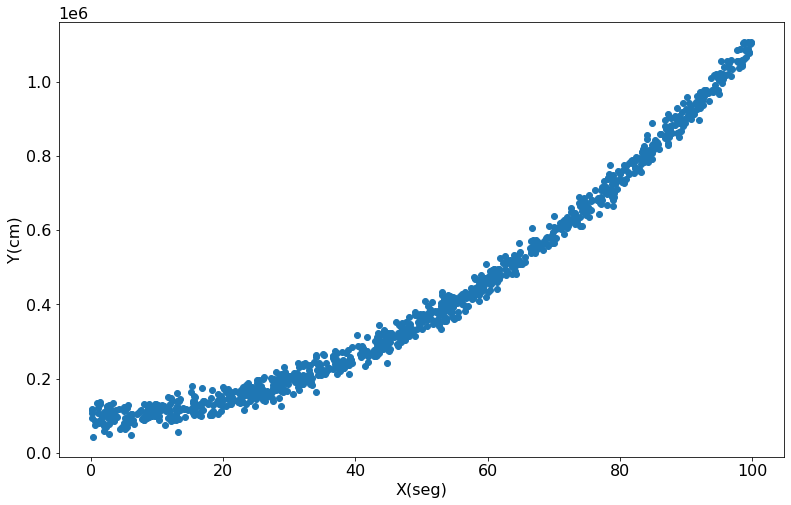

In [47]:
# Plotting y versus x

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y(cm)', fontsize=16)
plt.xlabel('X(seg)', fontsize=16)

plt.scatter(x, y)
plt.show()